In [1]:
## Load combined DF and test Machine/Deep Learning Models 

In [2]:
from pathlib import Path
import pandas as pd

# import csv
# import glob

# import os
# import requests
# import json

# import quandl

# from dotenv import load_dotenv
# load_dotenv()

In [3]:
## Machine Learning Imports 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
## Load pickle for exports and imports of data  
import pickle 
def load_obj(path):
    with open(path, 'rb') as f:
        return pickle.load(f)
    
def save_obj(obj, path ):
    with open(path, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [5]:
df = load_obj('FilesExportIndividualSymbol/GME_combined_df.pkl')

In [6]:
df

,close,volume,change,changePercent,changeOverTime,QUANTITY_FAILS,ShortVolumeNSDQ,ShortExemptVolumeNSDQ,TotalVolumeNSDQ,ShortVolumeNYSE,ShortExemptVolumeNYSE,TotalVolumeNYSE
Date,,,,,,,,,,,,
2020-01-02,6.31,4430750,0.23,0.0378,0.122776,10609.0,872127.0,8472.0,1185904.0,276386.0,2448.0,527414.0
2020-01-03,5.88,3550961,-0.43,-0.0681,0.046263,28692.0,520156.0,11999.0,832247.0,306258.0,2.0,506189.0
2020-01-06,5.85,3394777,-0.03,-0.0051,0.040925,28665.0,498788.0,20569.0,859426.0,198834.0,15.0,319375.0
2020-01-07,5.52,5235519,-0.33,-0.0564,-0.017794,0.0,604854.0,6372.0,1908324.0,351972.0,991.0,523321.0
2020-01-08,5.72,5629445,0.20,0.0362,0.017794,7039.0,746989.0,26168.0,1480915.0,529867.0,28.0,852908.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-08,172.68,818207,0.56,0.0033,29.725979,3369.0,127261.0,1889.0,207559.0,22569.0,83.0,49483.0
2021-10-11,178.10,2684855,5.42,0.0314,30.690391,0.0,442600.0,4696.0,711928.0,100482.0,163.0,280789.0
2021-10-12,175.82,1233652,-2.28,-0.0128,30.284698,43995.0,201231.0,428.0,331727.0,47431.0,5.0,100709.0


In [7]:
X = df.iloc[:,1:].values
#X

In [8]:
y = df.iloc[:,0].values
#y

In [9]:
# Split the data into training and testing sets using the train_test_split method from sklearn.


# YOUR CODE HERE!


# Scale the data for the features set X_tain and X_test


# YOUR CODE HERE!


In [10]:
# # Scale the data of the features set using the StandardScaler
# from sklearn.preprocessing import StandardScaler
# # YOUR CODE HERE
# scaler = StandardScaler().fit(X)
# X = scaler.transform(X)

In [11]:
# Define the model 
test_size_value = 0.33
number_hidden_nodes1 = 100
number_hidden_nodes2 = 80
number_hidden_nodes3 = 60
number_input_features = 11
number_output_features= 1
epoch_count = 500


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size_value, random_state=1)
X_scaler = StandardScaler().fit(X_train)           ## Fit scaler using trained data 
X_train_scaled= X_scaler.transform(X_train)        ## Scale both train and test data 
X_test_scaled = X_scaler.transform(X_test)


nn = Sequential()
# Create a neural network with 2 hidden layers
# Hidden layer #1
nn.add(
    Dense(units=number_hidden_nodes1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(
    Dense(units=number_hidden_nodes2, activation="relu")
)
# Third hidden layer
nn.add(
    Dense(units=number_hidden_nodes3, activation="relu")
)

# Output layer 
nn.add(
    Dense(units=number_output_features, activation="linear")
)

In [12]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model = nn.fit(X_train_scaled, y_train, epochs=epoch_count,verbose=0)

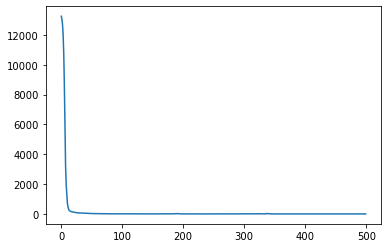

In [13]:
plt.plot(model.history["loss"])

In [14]:
# plt.plot(model.history["loss"])
# plt.plot(model.history["val_loss"])
# plt.title("loss_function - 1 hidden layer - Train Vs. Test")
# plt.legend(["train", "test"])
# plt.show()

In [15]:
## Export to test to see if this predicts 
# Save model as JSON
# YOUR CODE HERE!
nn_json = nn.to_json()
file_path = Path("AnalysisResources/model.json")
with open(file_path, "w") as json_file:
    json_file.write(nn_json)

# Save weights
file_path = "AnalysisResources/model.h5"
nn.save_weights(file_path)

 # Load the model to predict values
from tensorflow.keras.models import model_from_json

# Load json and create model
file_path = Path("AnalysisResources/model.json")
with open(file_path, "r") as json_file:
    model_json = json_file.read()
loaded_model = model_from_json(model_json)

# Load weights into new model
file_path = "AnalysisResources/model.h5"
loaded_model.load_weights(file_path)

In [16]:
# Predict values using the testing data
# YOUR CODE HERE!

y_pred = loaded_model.predict(X_test_scaled)

In [17]:
# Evaluate the model with the MSE metric
# YOUR CODE HERE!
print(mean_squared_error(y_test,y_pred))

77.25336496835176


In [18]:
model_loss, model_accuracy = nn.evaluate(
    X_test_scaled, y_test, verbose=2
)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

5/5 - 0s - loss: 77.2534 - mse: 77.2534 - 116ms/epoch - 23ms/step
Loss: 77.25336456298828, Accuracy: 77.25336456298828
